<a href="https://colab.research.google.com/github/amitroyal8755/time_series/blob/main/itc_priceby_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [3]:
import plotly.io as pio
pio.renderers.default='colab'

In [4]:
df=pd.read_csv('/content/itc.csv')

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Date            object
Close Price    float64
dtype: object

In [5]:
df.head()

,Date,Close Price
0,7/24/2019,270.85
1,7/25/2019,267.85
2,7/26/2019,270.40
3,7/29/2019,267.75
4,7/30/2019,268.90


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         496 non-null    object 
 1   Close Price  496 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [7]:
px.area(df,x='Date',y='Close Price')

In [8]:
px.line(df,x='Date',y='Close Price')

In [14]:
df.columns=['ds','y']

In [15]:
df.head()

,ds,y
0,2019-07-24,270.85
1,2019-07-25,267.85
2,2019-07-26,270.40
3,2019-07-29,267.75
4,2019-07-30,268.90


In [16]:
model=Prophet()

In [17]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future=model.make_future_dataframe(80)

In [21]:
y_pred=model.predict(future)

In [23]:
y_pred.head()
#yhat is the predicated values

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-24,255.938785,244.392522,266.014710,255.938785,255.938785,-0.477076,-0.477076,-0.477076,-0.477076,-0.477076,-0.477076,0.0,0.0,0.0,255.461709
1,2019-07-25,255.872384,244.303126,266.767947,255.872384,255.872384,-0.074254,-0.074254,-0.074254,-0.074254,-0.074254,-0.074254,0.0,0.0,0.0,255.798130
2,2019-07-26,255.805982,244.604497,265.991546,255.805982,255.805982,-0.260554,-0.260554,-0.260554,-0.260554,-0.260554,-0.260554,0.0,0.0,0.0,255.545428
3,2019-07-29,255.606778,242.187836,266.092407,255.606778,255.606778,-0.921664,-0.921664,-0.921664,-0.921664,-0.921664,-0.921664,0.0,0.0,0.0,254.685114
4,2019-07-30,255.540377,243.536289,265.292222,255.540377,255.540377,-0.740049,-0.740049,-0.740049,-0.740049,-0.740049,-0.740049,0.0,0.0,0.0,254.800328


In [49]:
px.line(y_pred,x='ds',y='yhat')

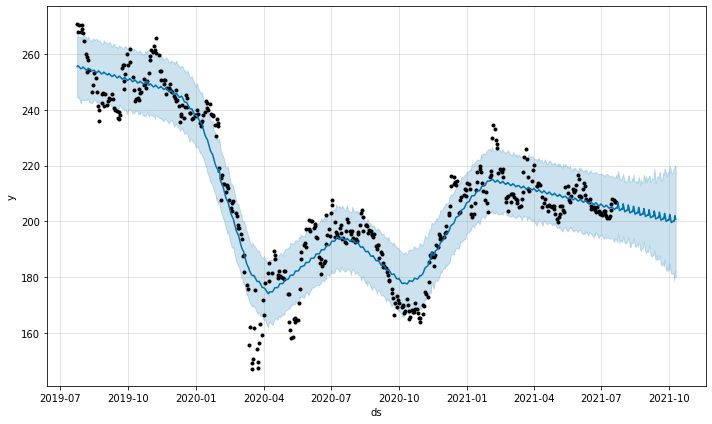

In [51]:
figure=model.plot(y_pred,xlabel='ds',ylabel='y')

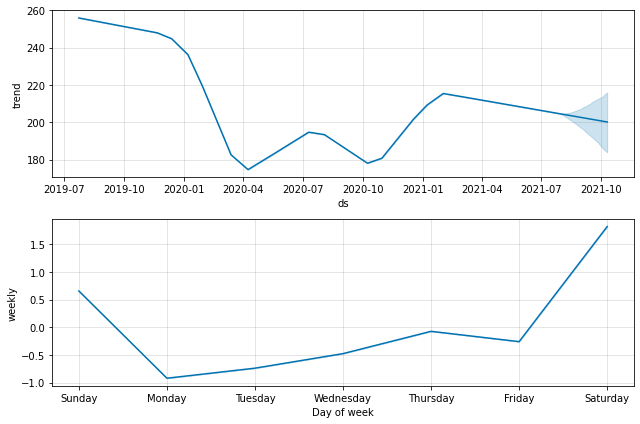

In [53]:
figure2=model.plot_components(y_pred)

In [54]:
#itc will be in sideways for next couple of month

In [56]:
from joblib import dump

In [57]:
dump(model, 'itc_predication.joblib') 

['itc_predication.joblib']